In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv('ObesityDataSet.csv')
data.head(4)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I


In [18]:
columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
matriz = data[columns].corr()

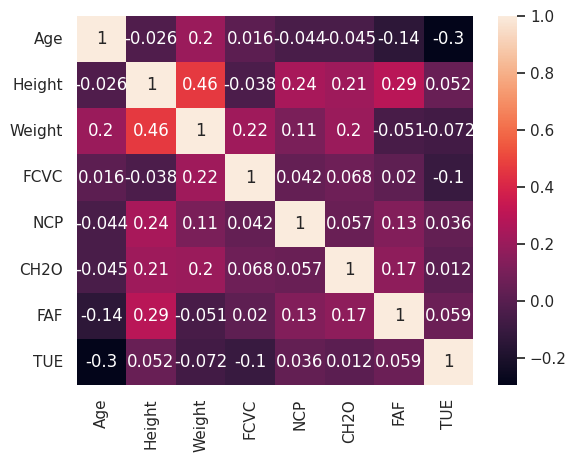

In [34]:
sns.set(style='whitegrid', context='notebook')
sns.heatmap(matriz, annot=True)
plt.show()

In [35]:
X = data['Height'].values.reshape(-1,1)
y = data['Weight'].values.reshape(-1,1)

In [36]:
# Creando el modelo
sc_X = StandardScaler()
sc_y = StandardScaler()

In [37]:
X_std = sc_X.fit_transform(X)
y_std = sc_y.fit_transform(y)

In [40]:
slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

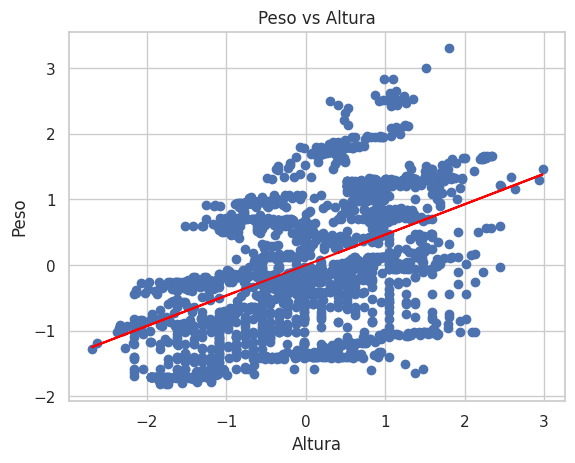

In [47]:
# Analizando los resultados
plt.scatter(X_std, y_std)
plt.plot(X_std, slr.predict(X_std), color='red')
plt.ylabel("Peso")
plt.xlabel("Altura")
plt.title('Peso vs Altura')
plt.show()


In [49]:
# Generando una predicción
altura = 1.75
altura_std = sc_X.transform(np.array([altura]).reshape(-1,1))
print(f"El peso aproximado de una persona que tiene una altura de {altura} mts es: ", sc_y.inverse_transform(altura_std))

El peso aproximado de una persona que tiene una altura de 1.75 mts es:  [[100.15048854]]
